In [1]:
import scanpy as sc

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.figdir ='../review-figure-updates-pdfs/'
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.0 numpy==1.20.0 scipy==1.6.0 pandas==1.2.1 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1


/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [3]:
# Load preprocessed file
results_file = sc.read('../data/YM_1_164_CCregressed_increased_depth_YM_UMAP.h5ad', cache=True)

In [4]:
# Compute UMAP
sc.tl.umap(results_file)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [5]:
# Perform Leiden Clustering
sc.tl.leiden(results_file, resolution=0.18)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


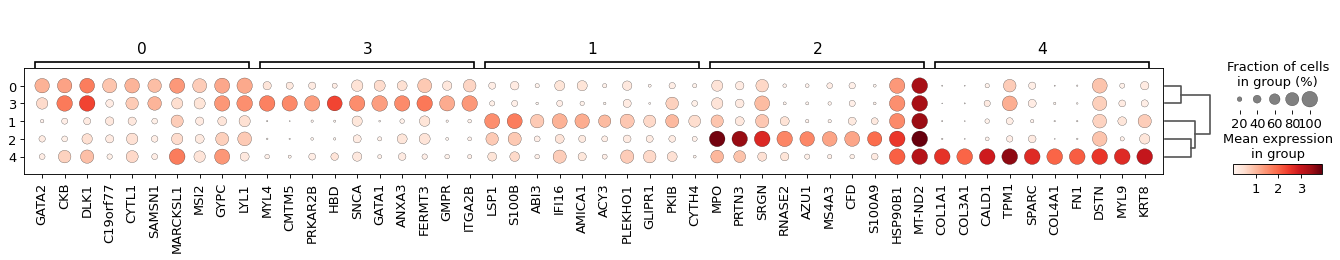

In [4]:
sc.tl.rank_genes_groups(results_file, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(results_file,
                                save='rank_groups.pdf')

In [5]:
# Rename Samples
new_sample_names = [
    'Uncoated', 'VCAM1',
    'DLL4', 'DLL4_VCAM1']
results_file.rename_categories('Sample', new_sample_names)

In [6]:
# Rename cluster based on marker annotation
new_cluster_names = [
    'HSC/MPP', 'Myeloid prog',
    'Neutrophil prog', 'Ery/Mk prog',
    'Stromal/mesenchymal']
results_file.rename_categories('leiden', new_cluster_names)

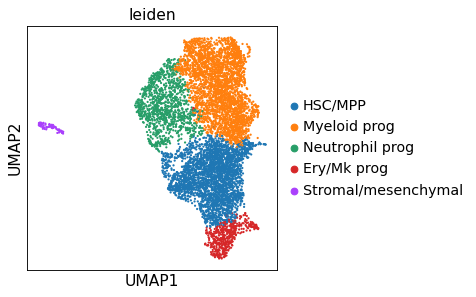

In [7]:
# Plot cell types
sc.pl.umap(results_file, color=['leiden'], ncols=1)

# Remove Stromal Cells

In [8]:
# Remove stromal because they resemble dead/dying cells
no_stromal = results_file[results_file.obs['leiden'].isin(['HSC/MPP', 'Myeloid prog',
                                                           'Neutrophil prog','Ery/Mk prog'])]

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


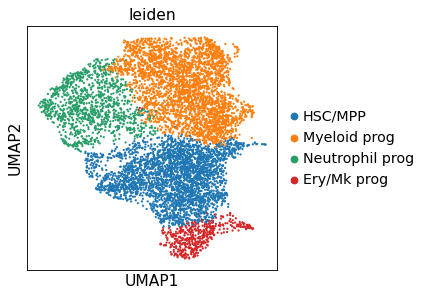

In [9]:
# UMAP No Stromal
sc.pl.umap(no_stromal, color=['leiden'])

## Generate Frequency Distributions of cell clusters for each coating condition

#### Cell Type Frequencies Used for Generation of FIGURE 2E

In [10]:
Uncoated_Cells = no_stromal[no_stromal.obs['Sample'].isin(['Uncoated'])]
VCAM1_Cells = no_stromal[no_stromal.obs['Sample'].isin(['VCAM1'])]
DLL4_Cells = no_stromal[no_stromal.obs['Sample'].isin(['DLL4'])]
DLL4_VCAM1_Cells = no_stromal[no_stromal.obs['Sample'].isin(['DLL4_VCAM1'])]

In [11]:
Uncoated_Cells.obs['leiden'].value_counts()

Myeloid prog       760
HSC/MPP            732
Neutrophil prog    452
Ery/Mk prog        194
Name: leiden, dtype: int64

In [12]:
VCAM1_Cells.obs['leiden'].value_counts()

Myeloid prog       710
HSC/MPP            655
Neutrophil prog    456
Ery/Mk prog        179
Name: leiden, dtype: int64

In [13]:
DLL4_Cells.obs['leiden'].value_counts()

HSC/MPP            912
Myeloid prog       745
Neutrophil prog    119
Ery/Mk prog         72
Name: leiden, dtype: int64

In [14]:
DLL4_VCAM1_Cells.obs['leiden'].value_counts()

Myeloid prog       736
HSC/MPP            675
Neutrophil prog     68
Ery/Mk prog         37
Name: leiden, dtype: int64

In [15]:
DL4_palette = ['teal','deepskyblue','goldenrod','violet']

Trying to set attribute `.uns` of view, copying.


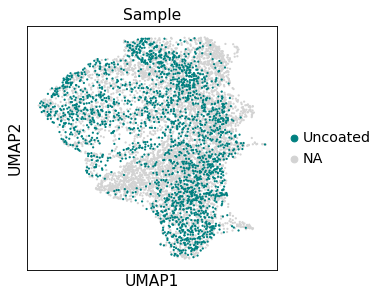

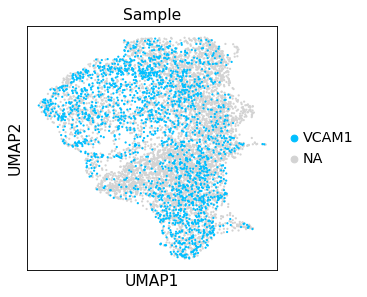

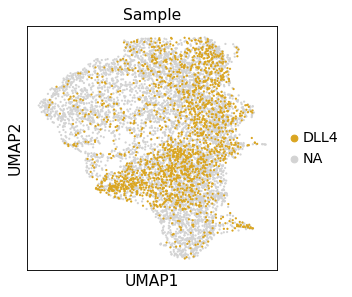

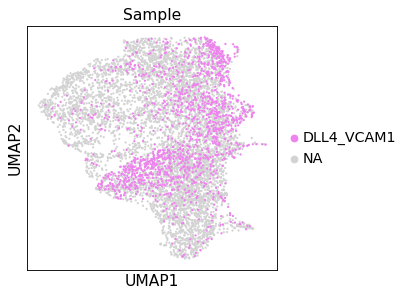

In [16]:
# Coating Conditions
sc.pl.umap(no_stromal, color='Sample', groups=['Uncoated'], palette= DL4_palette, save ='Uncoated_UMAP.pdf')
sc.pl.umap(no_stromal, color='Sample', groups=['VCAM1'], save ='VCAM1_UMAP.pdf')
sc.pl.umap(no_stromal, color='Sample', groups=['DLL4'], save ='DLL4_UMAP.pdf')
sc.pl.umap(no_stromal, color='Sample', groups=['DLL4_VCAM1'],save ='DLL4_VCAM1_UMAP.pdf')

# Create NOTCH score with downstream NOTCH targets in MPP

In [17]:
MPP_comparison = no_stromal[no_stromal.obs['leiden']=='HSC/MPP']

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [18]:
Notch_gene_list = ['HES1', 'CD3D','HES4', 'DTX1', 'BCL11B','HEY2']

In [19]:
# Create NOTCH score in MPP
sc.tl.score_genes(MPP_comparison, gene_list = Notch_gene_list, score_name = 'Notch_score')

computing score 'Notch_score'
Trying to set attribute `.obs` of view, copying.
    finished: added
    'Notch_score', score of gene set (adata.obs).
    249 total control genes are used. (0:00:00)


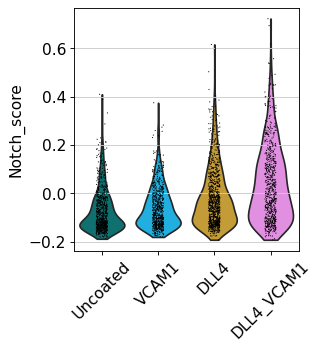

In [20]:
# Notch Score Violin Plot
sc.pl.violin(MPP_comparison, ['Notch_score'], groupby='Sample', palette= DL4_palette,
             #save ='Notch_activity_score.pdf',
            rotation=45)

In [21]:
MPP_comparison.layers['scaled'] = sc.pp.scale(MPP_comparison, copy=True).X

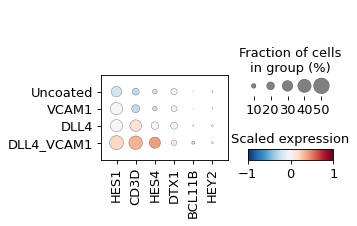

In [22]:
# Notch Genes
sc.pl.dotplot(MPP_comparison, var_names=Notch_gene_list, layer='scaled', groupby='Sample', cmap='RdBu_r',
             vmin=-1, vmax=1, colorbar_title='Scaled expression')

# Plot Expression of Endothelial and Hematopoietic Genes

In [23]:
no_stromal.layers['scaled'] = sc.pp.scale(no_stromal, copy=True).X

In [24]:
endo_hema_genes = ['SPN', 'PTPRC', 'GATA2', 'CD34', 'HLA-DRA', 'IFI16', 'MPO', 'SRGN', 'HBD', 'ITGA2B',
                  'CDH5']

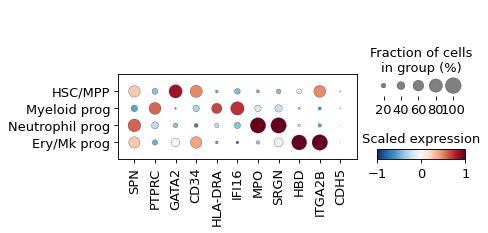

In [25]:
# Endothelial Hematopoietic Genes
sc.pl.dotplot(no_stromal, var_names=endo_hema_genes, layer='scaled', groupby='leiden', cmap='RdBu_r',
             vmin=-1, vmax=1, colorbar_title='Scaled expression')

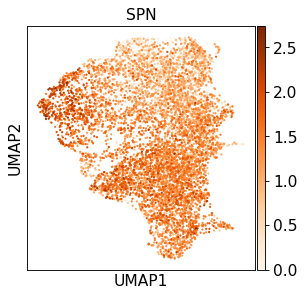

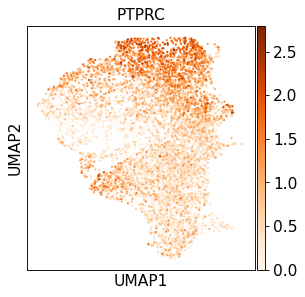

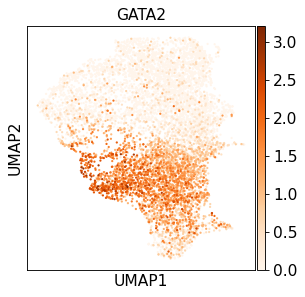

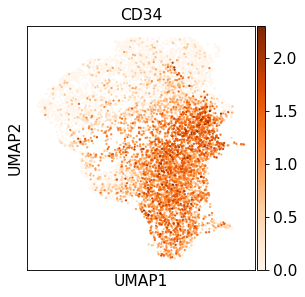

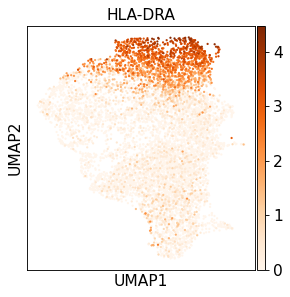

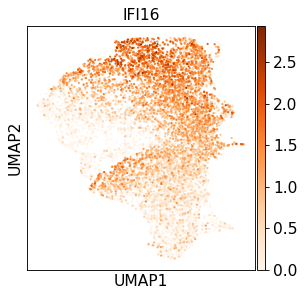

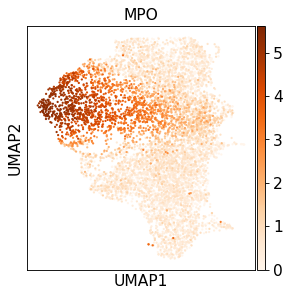

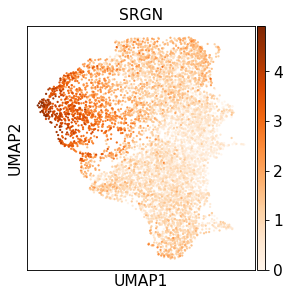

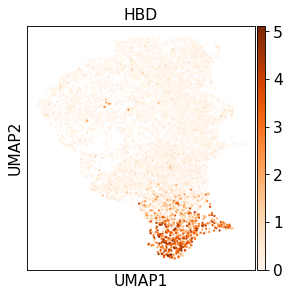

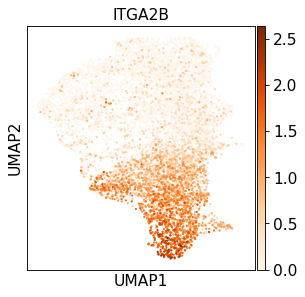

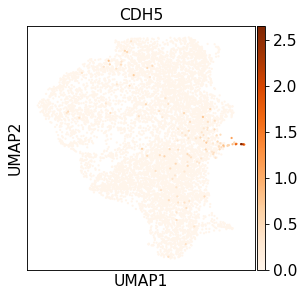

In [26]:
# UMAP Endo Hema Genes
for x in endo_hema_genes:
    sc.pl.umap(no_stromal, color=x, cmap='Oranges')

# Compare Globin Expression in Ery cells between conditions

In [27]:
Ery_comparison = no_stromal[no_stromal.obs['leiden']=='Ery/Mk prog']

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [28]:
Ery_comparison.layers['scaled'] = sc.pp.scale(Ery_comparison, copy=True).X

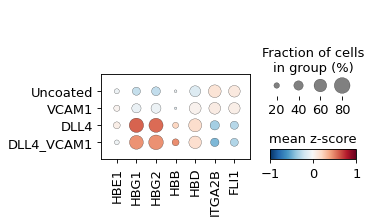

In [29]:
# Hemaglobin Genes
sc.pl.dotplot(Ery_comparison, ['HBE1','HBG1','HBG2', 'HBB','HBD','ITGA2B','FLI1'], 'Sample',
                colorbar_title='mean z-score', layer='scaled', vmin=-1, vmax=1, cmap='RdBu_r')

# Cluster Ery/MK Cells into Erythroids and Megakaryocytes

In [30]:
sc.tl.leiden(Ery_comparison, resolution=0.18)

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [31]:
sc.tl.umap(Ery_comparison)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


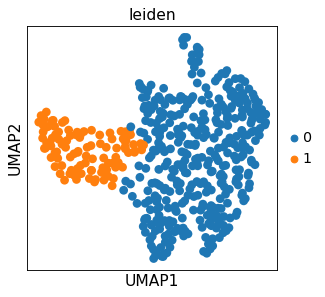

In [32]:
# Ery/mk Clusters
sc.pl.umap(Ery_comparison, color= ['leiden'])

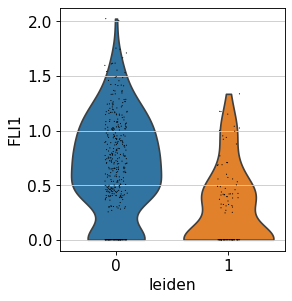

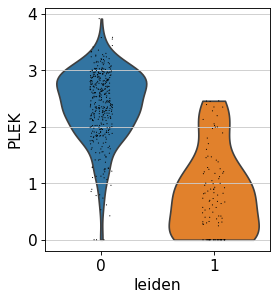

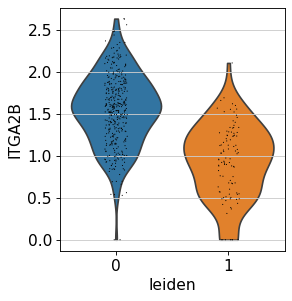

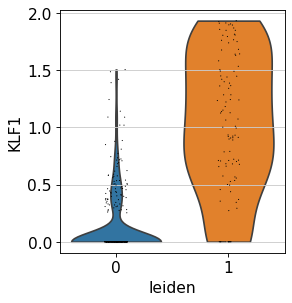

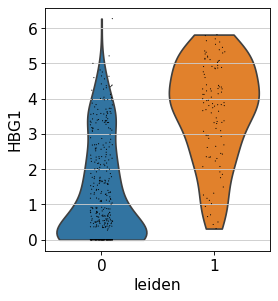

In [33]:
# Ery/mk genes
gene_list = ['FLI1', 'PLEK', 'ITGA2B', 'KLF1', 'HBG1']
for x in gene_list:
    sc.pl.violin(Ery_comparison, groupby='leiden', keys=x)

#### Determine Number of Ery and MK for each coating condition

In [34]:
Uncoated_Ery = Ery_comparison[Ery_comparison.obs['Sample'].isin(['Uncoated'])]
VCAM1_Ery = Ery_comparison[Ery_comparison.obs['Sample'].isin(['VCAM1'])]
DLL4_Ery = Ery_comparison[Ery_comparison.obs['Sample'].isin(['DLL4'])]
DLL4VCAM1_Ery = Ery_comparison[Ery_comparison.obs['Sample'].isin(['DLL4_VCAM1'])]

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [35]:
DLL4VCAM1_Ery.obs['leiden'].value_counts()

0    19
1    18
Name: leiden, dtype: int64

In [36]:
DLL4_Ery.obs['leiden'].value_counts()

1    41
0    31
Name: leiden, dtype: int64

In [37]:
VCAM1_Ery.obs['leiden'].value_counts()

0    157
1     22
Name: leiden, dtype: int64

In [38]:
Uncoated_Ery.obs['leiden'].value_counts()

0    173
1     21
Name: leiden, dtype: int64